
## `ceiling_height_agl:m` and `cloud_base_agl:m`

`ceiling_height_agl:m` is a feauture that is defined as the height of the lowest cloud layer covering or where clouds are present above 6000 meters. `cloud_base_agl:m` is defined as the lowest altitude of the visible portion of a cloud. However, when there are no clouds, these valued cannot be determined, and we observe a lot of empty cells, which can create possible problems in our datasets.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

X_train_estimated_a = pd.read_parquet('../../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../../data/C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('../../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../../data/C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('../../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../../data/C/X_test_estimated.parquet')


116929


<AxesSubplot:title={'center':'Train/Test  C'}, xlabel='date_forecast'>

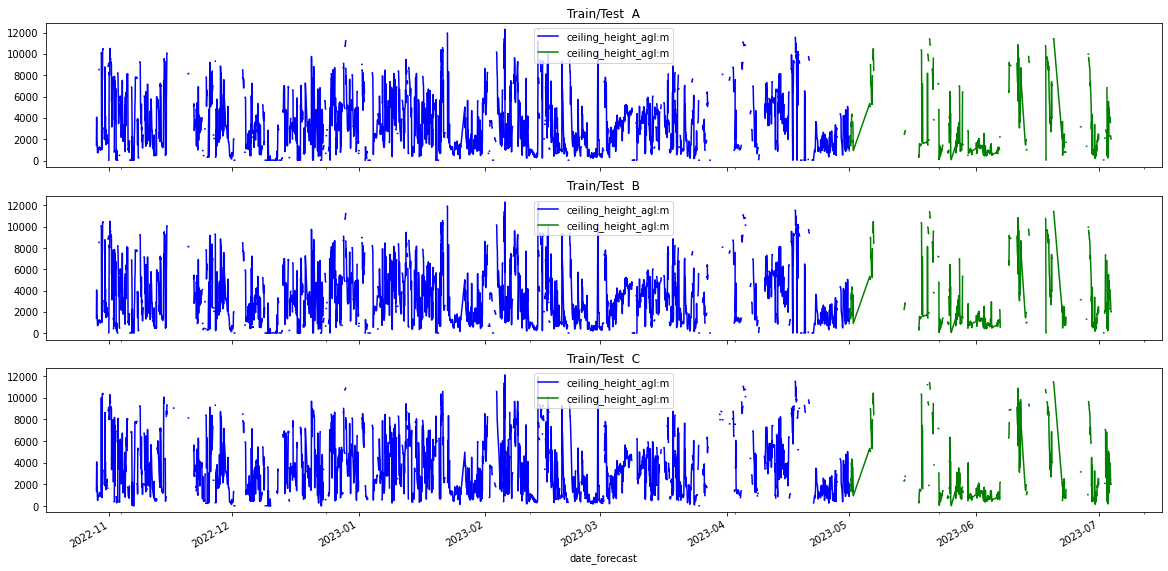

In [9]:

# Plotting ceiling height
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'ceiling_height_agl:m'
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

<AxesSubplot:title={'center':'Train/Test  C'}, xlabel='date_forecast'>

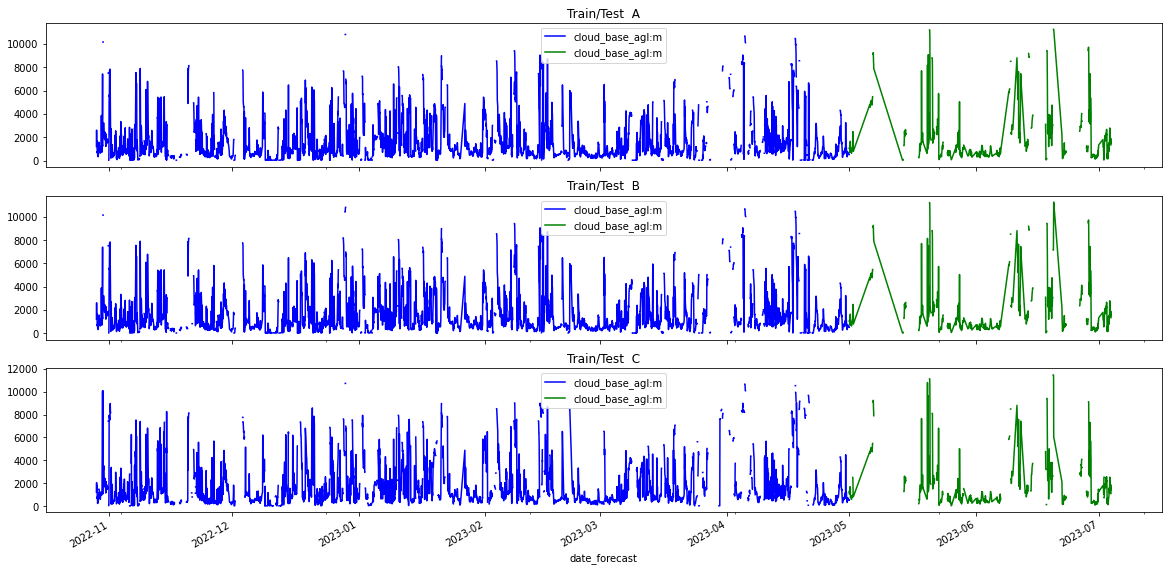

In [10]:
# Plotting a cloud base
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'cloud_base_agl:m'
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

Plotting these features we see that they are non-continuous and have a lot of missing values. The features were only plotted for the estimated weather datasets to emphasize this non-continuity. This can cause problems for models that are not able to handle missing values. 

A common method for imputing missing values is MICE. However in our case, the missing values are intended, and it would not make sense to use MICE. If we use models that cannot handle missing values it could be a solution to delete the columns `ceiling_height_agl:m` and `cloud_base_agl:m` even though this leads to a loss of potentially valuable data.